# **Análise de crimes cometidos em Ouro Preto**

In [ ]:
from google.colab import drive

# Montar o Google Drive no Google Colab
drive.mount('/content/gdrive', force_remount=True)

# Lista de nomes de arquivos após o caminho do Google Drive
paths = [
    '/content/gdrive/My Drive/TP_IA_2/Banco Alvos de Furto - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Alvos de Roubo - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Crimes Violentos - Atualizado 2012 a 2017.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Crimes Violentos - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Outras Naturezas Armazm - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Veculos Furtados - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Veiculos Roubados - Atualizado Junho 2023.csv',
    '/content/gdrive/My Drive/TP_IA_2/Banco Vitimas de Homicdio Consumado - Atualizado Junho 2023.csv'
]


Mounted at /content/gdrive


# **Seleção e tratamento dos dados**

In [ ]:
import pandas as pd

df_total = pd.DataFrame()

for path in paths:
    df = pd.read_csv(path, delimiter=';')
    df.rename(columns={'Munic�pio': 'Cidade', 'M�s ': 'Mes'}, inplace=True)
    colunas_desejadas = ['Registros','Natureza','Cidade','Mes','Ano']
    df = df.drop(columns=[col for col in df.columns if col not in colunas_desejadas], axis=1)
    df_total = pd.concat([df_total, df])
print('shape inicial: ',df.shape)

df_op = df_total[df_total['Cidade'] == 'OURO PRETO']
df_op = df_op.drop(['Cidade'], axis=1)

print('shape op: ',df_op.shape)

# Agrupar por natureza de crime e somar os valores da coluna "Registros"
soma_por_natureza = df_op.groupby('Natureza')['Registros'].sum()

print(soma_por_natureza.sort_values(ascending=False))

crimes_com_mais_ocorrencias = soma_por_natureza.nlargest(8)

df_op = df_op[df_op['Natureza'].isin(crimes_com_mais_ocorrencias.index)]
print('======================================================')
print("DataFrame com apenas os dados das 8 naturezas mais ocorridas:")
print(df_op)
print('shape final: ',df_op.shape)

shape inicial:  (117714, 5)
shape op:  (3432, 4)
Natureza
Furto Consumado                          12061
Furto                                     5657
Les�o Corporal Consumado                  2442
Roubo Consumado                           1178
Roubo                                      663
Homic�dio Tentado                          147
Roubo Tentado                              135
Estupro de Vulner�vel Consumado            119
V�tima de Homic�dio Consumado               87
Homic�dio Consumado (Registros)             86
Estupro Consumado                           83
Extors�o Consumado                          53
Estupro Tentado                             32
Sequestro e C�rcere Privado Consumado       19
Extors�o Tentado                            13
Estupro de Vulner�vel Tentado               11
Extors�o Mediante Sequestro Consumado        2
Sequestro e C�rcere Privado Tentado          2
Name: Registros, dtype: int64
DataFrame com apenas os dados das 8 naturezas mais ocorridas:
    

# **Análise dos dados originais**

In [ ]:
import matplotlib.pyplot as plt

def plot_line_graph(dataframe) :
  grouped = dataframe.groupby(['Natureza', 'Mes'])['Registros'].sum().reset_index()

  plt.figure(figsize=(12, 6))

  for natureza in grouped['Natureza'].unique():
      data = grouped[grouped['Natureza'] == natureza]
      plt.plot(data['Mes'], data['Registros'], marker='o', label=natureza)

  plt.xlabel('Mês')
  plt.ylabel('Volume de Crimes')
  plt.title('Volume de Crimes Cometidos por Natureza por Mês')
  plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.grid(True)
  plt.show()



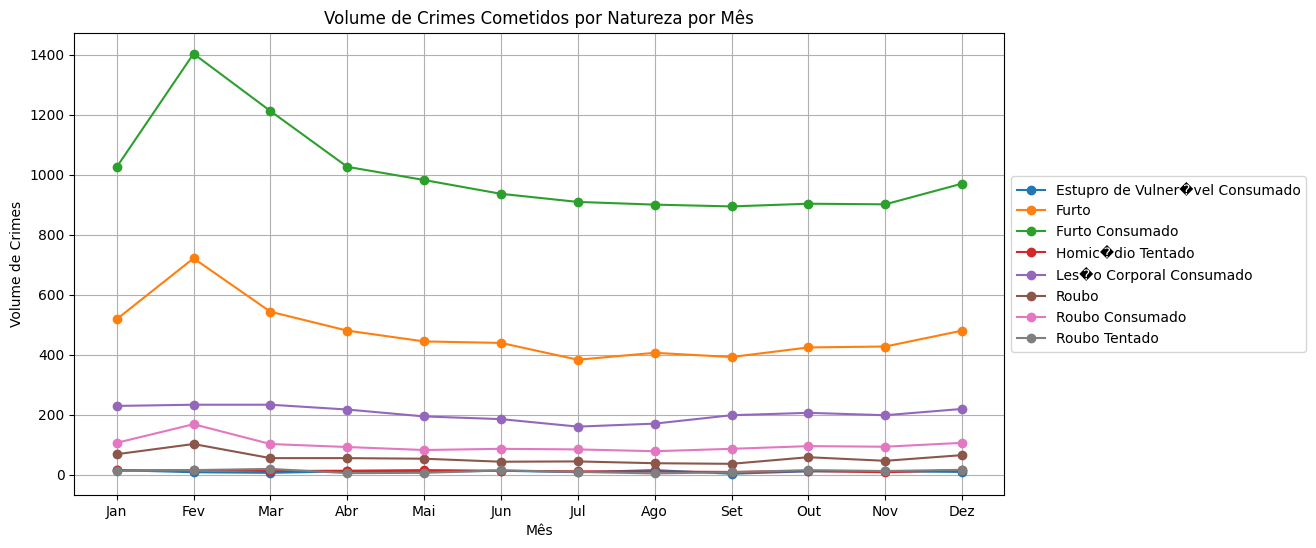

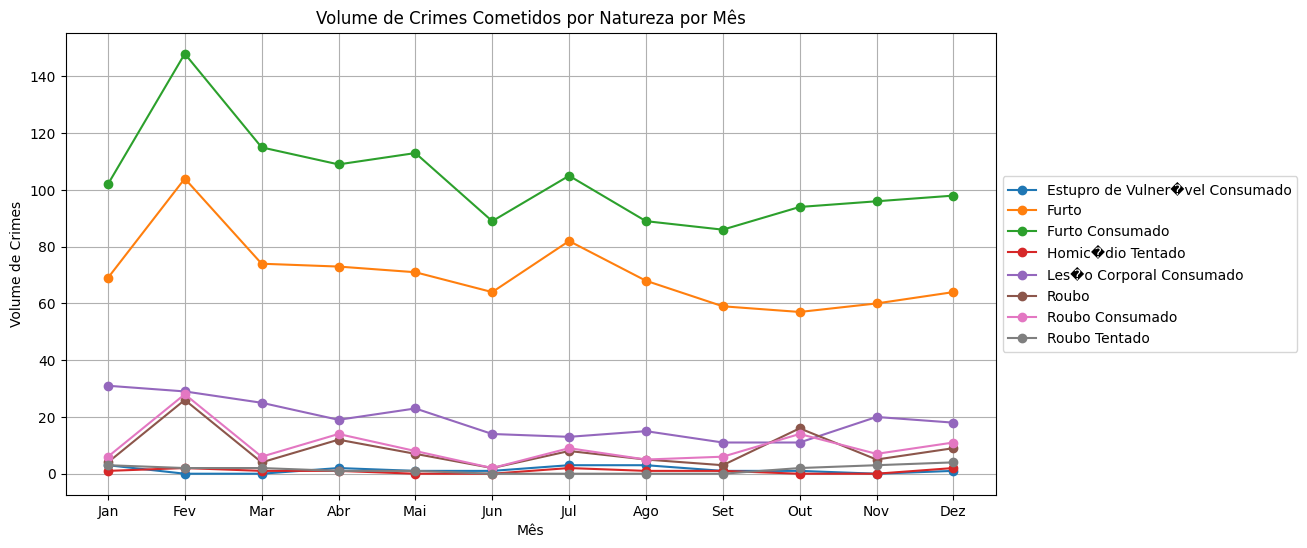

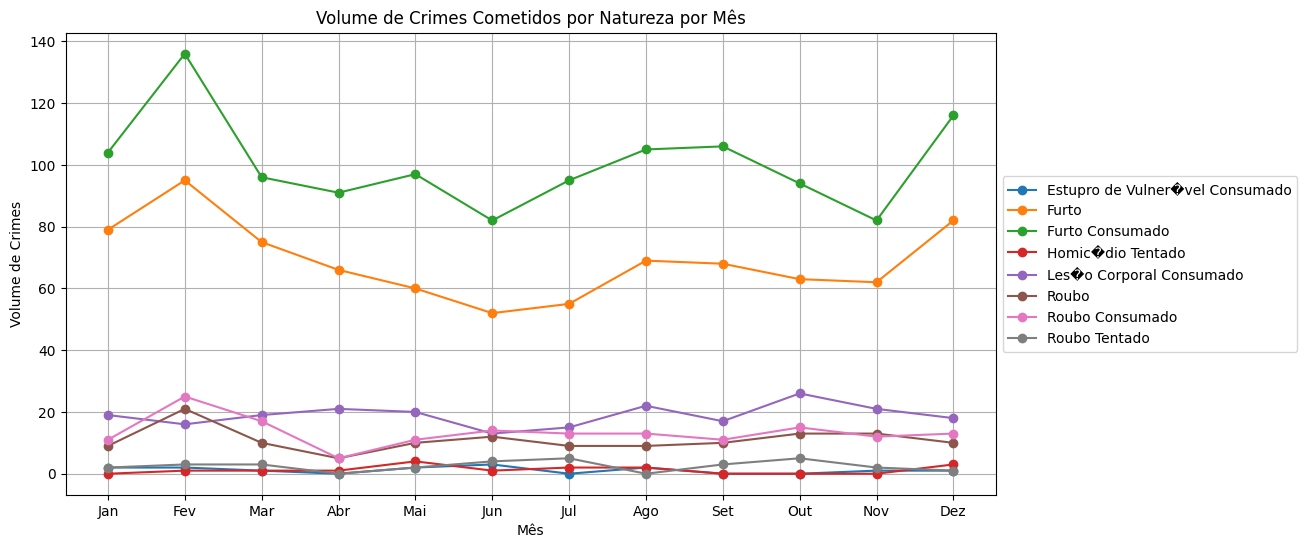

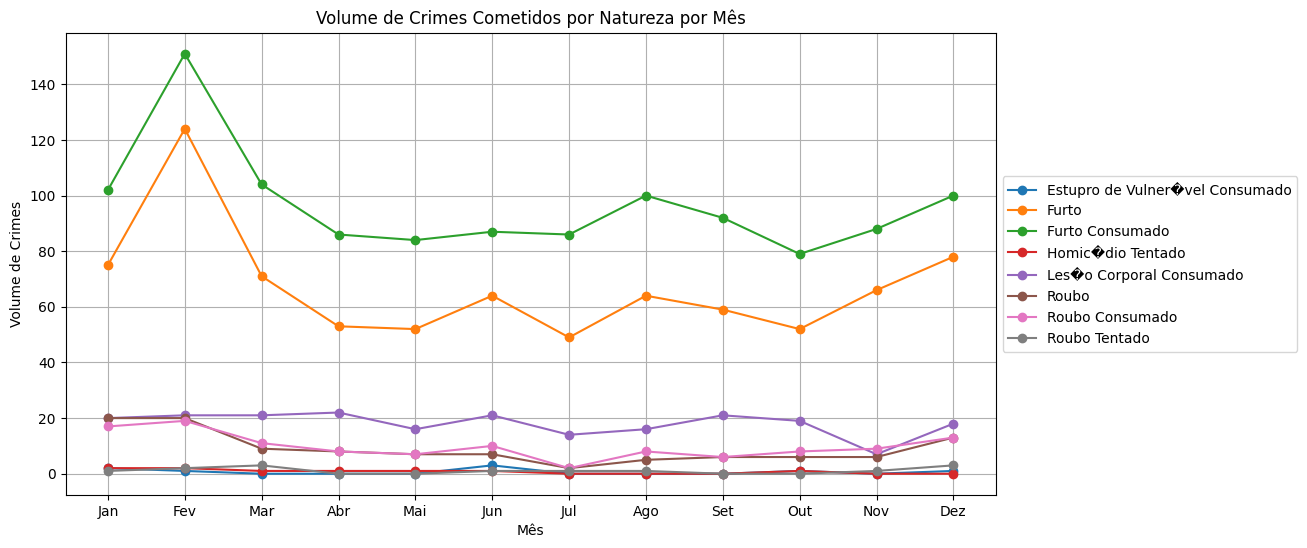

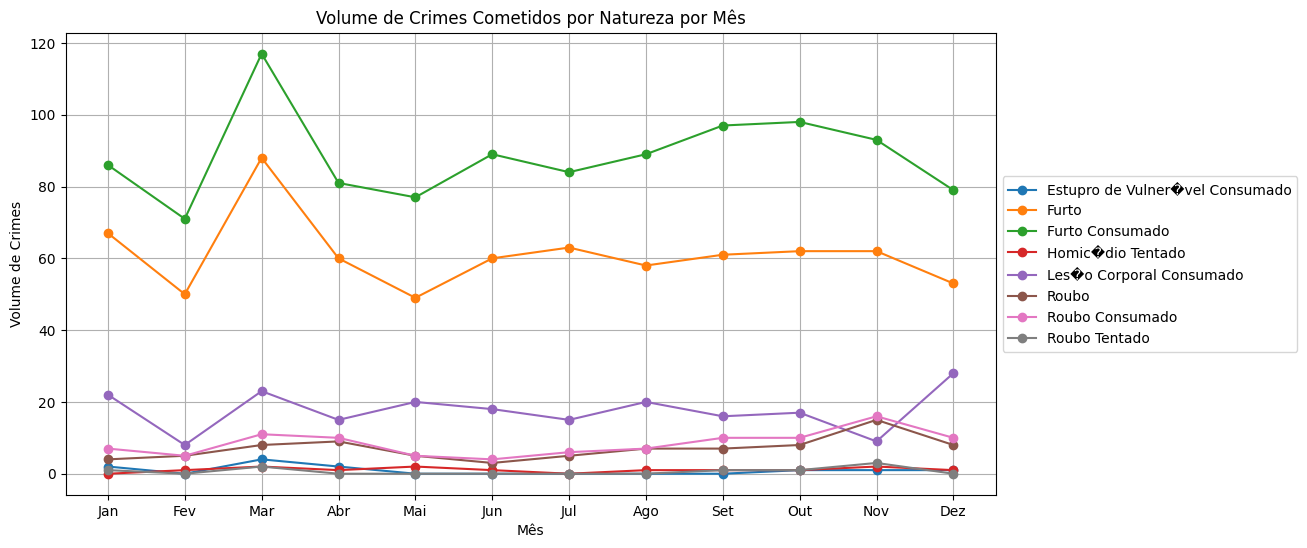

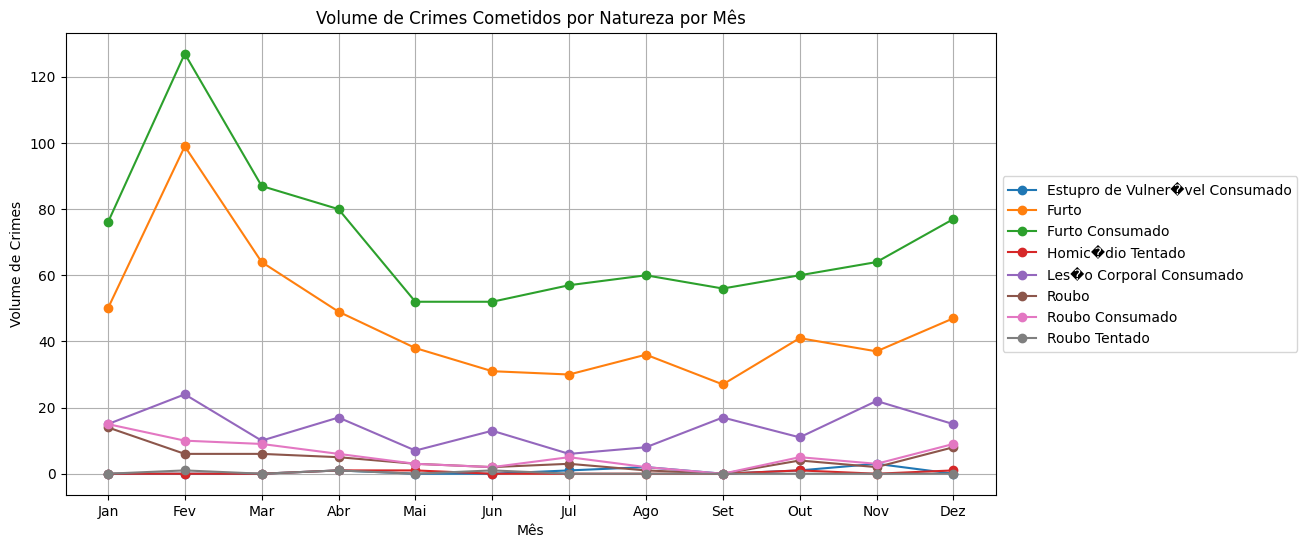

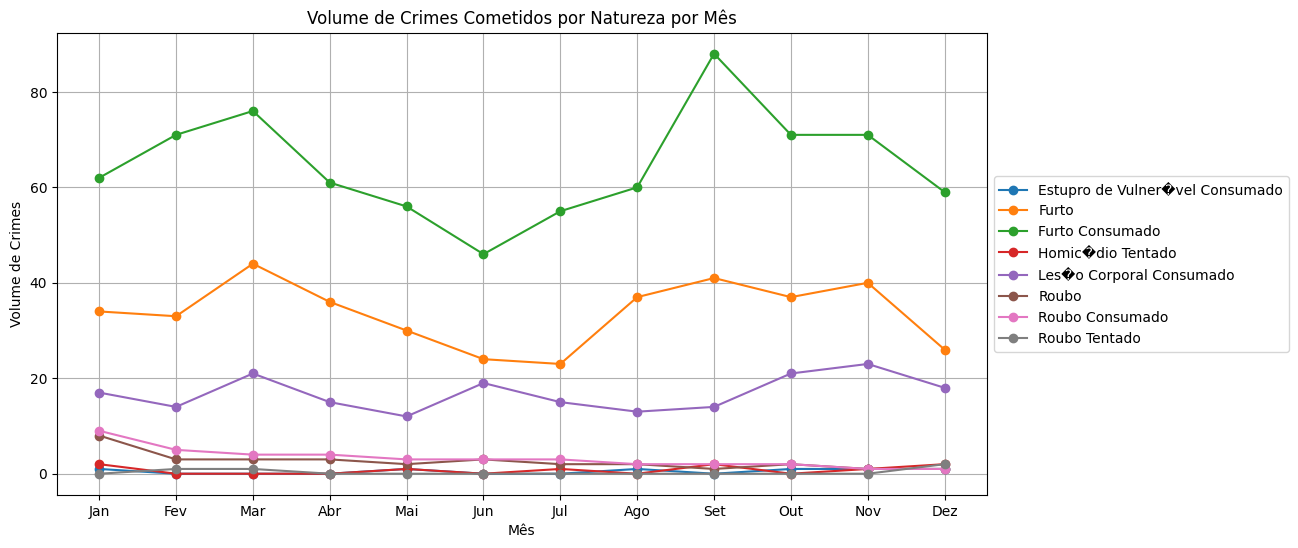

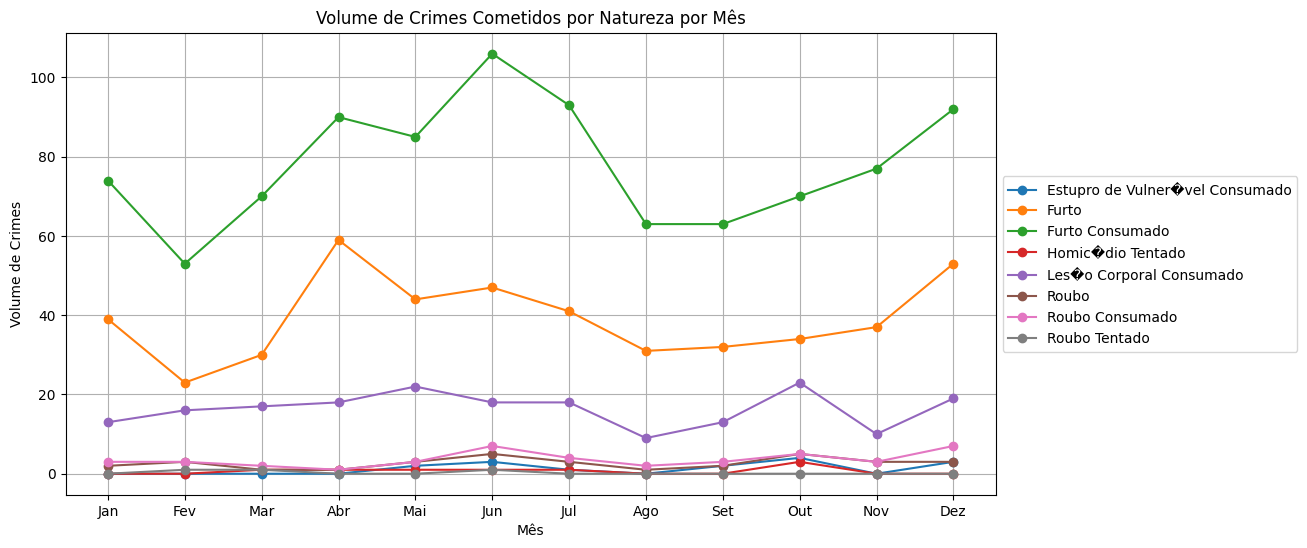

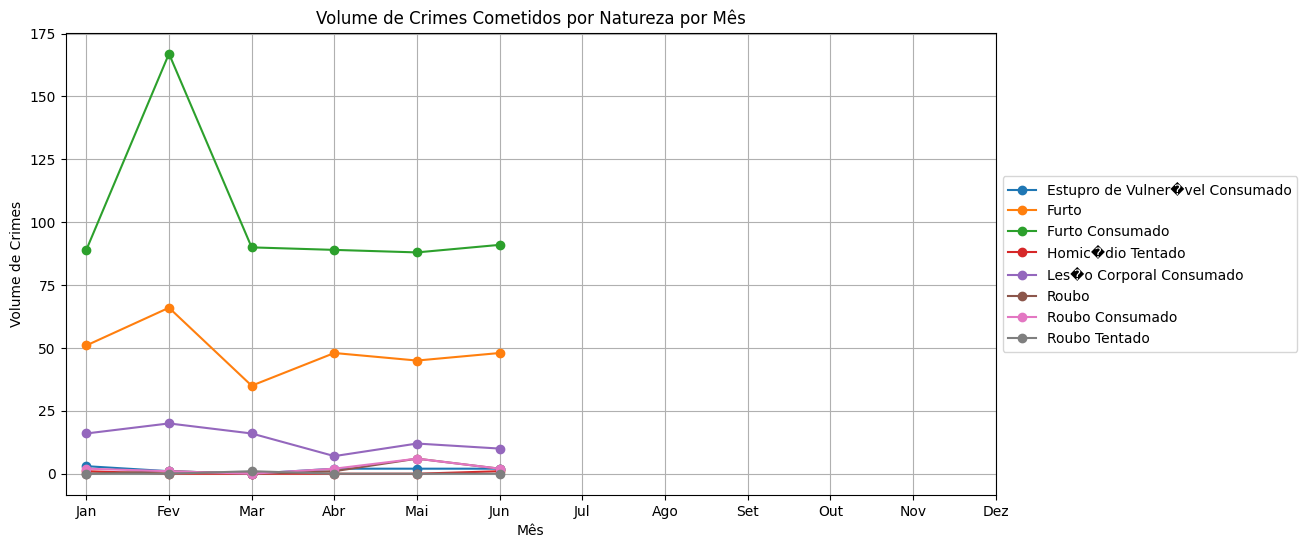

In [ ]:
plot_line_graph(df_op)
plot_line_graph(df_op[df_op['Ano']==2016])
plot_line_graph(df_op[df_op['Ano']==2017])
plot_line_graph(df_op[df_op['Ano']==2018])
plot_line_graph(df_op[df_op['Ano']==2019])
plot_line_graph(df_op[df_op['Ano']==2020])
plot_line_graph(df_op[df_op['Ano']==2021])
plot_line_graph(df_op[df_op['Ano']==2022])
plot_line_graph(df_op[df_op['Ano']==2023])

# **Realização do treinamento**

Model: Linear Regression
Mean Absolute Error: 3.6944444444444446
R-squared: 0.8803746616051527


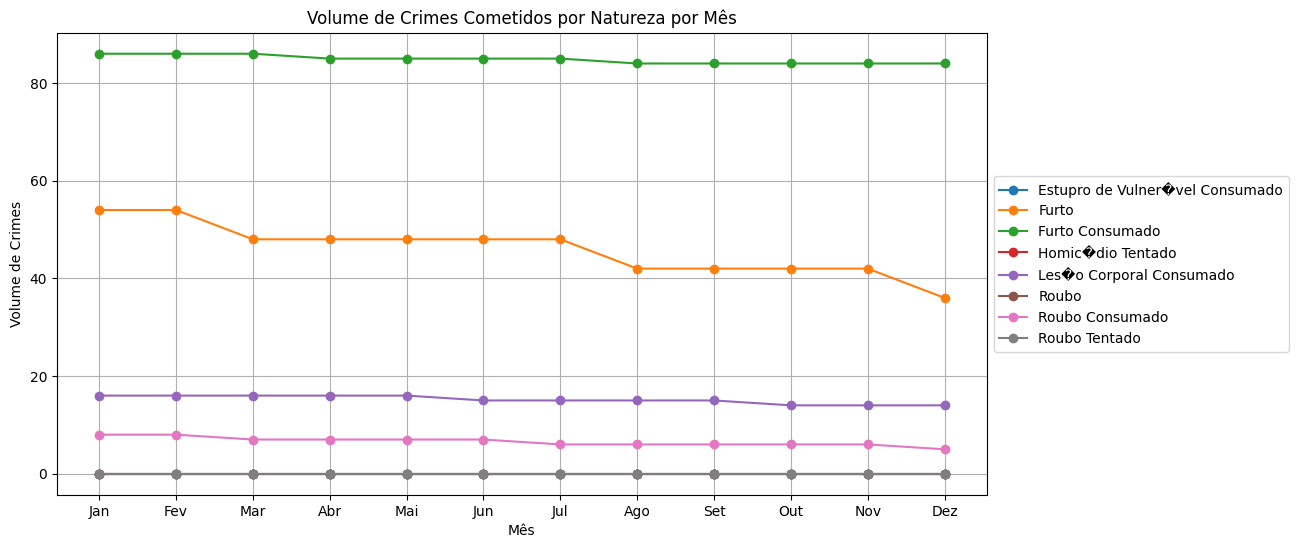

---
Model: Random Forest
Mean Absolute Error: 3.861111111111111
R-squared: 0.8162732305584679


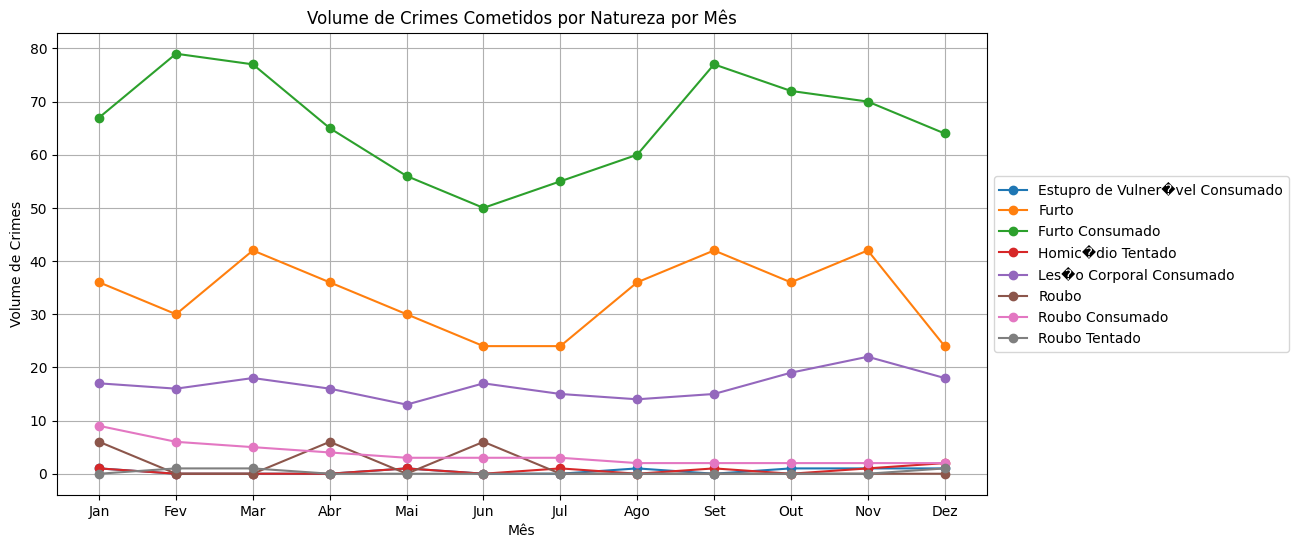

---
Model: Decision Tree
Mean Absolute Error: 3.9537037037037037
R-squared: 0.8000381699303503


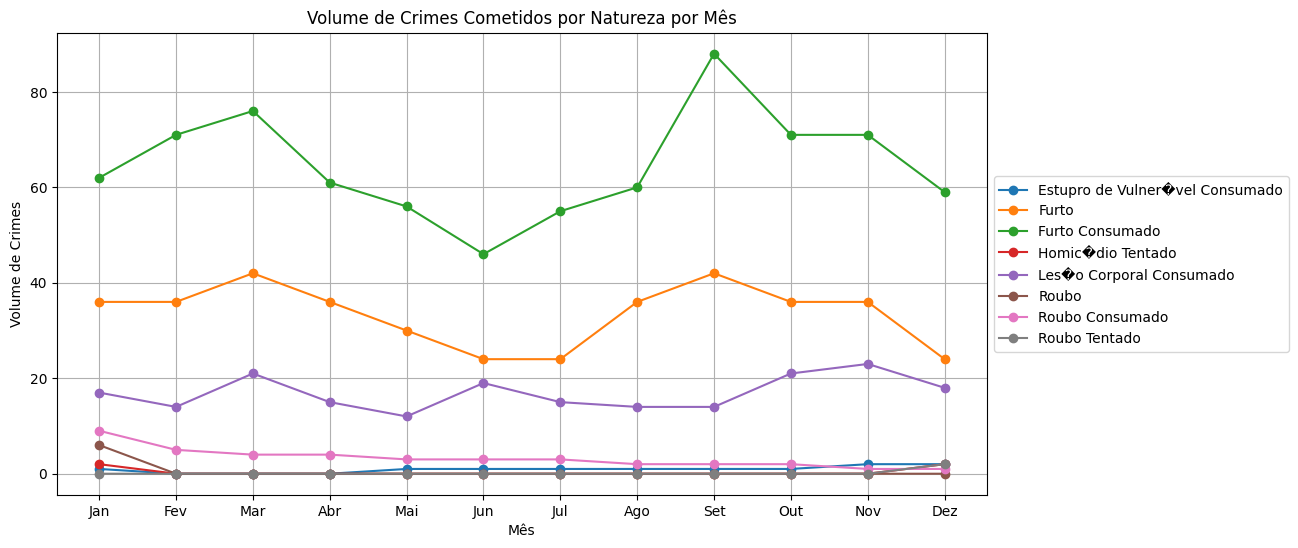

---


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

df = pd.get_dummies(df_op, columns=['Natureza'])

df_train = df[df['Ano'] < 2022]
x_train = df_train.drop(['Registros'], axis=1)
y_train = df_train['Registros']

df_test = df[df['Ano'] == 2022]
x_test = df_test.drop(['Registros'], axis=1)
y_test = df_test['Registros']

# Modelos a serem utilizados com hiperparâmetros para busca em grade
models = [
    ("Linear Regression", LinearRegression(), {}),
    ("Random Forest", RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 200]}),
    ("Decision Tree", DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20]})
]

for model_name, model, param_grid in models:
    print(f"Model: {model_name}")

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_int = np.maximum(np.round(y_pred), 0)

    mae_int = mean_absolute_error(y_test, y_pred_int)
    r2_int = r2_score(y_test, y_pred_int)

    print(f"Mean Absolute Error: {mae_int}")
    print(f"R-squared: {r2_int}")

    df_aux = pd.DataFrame()
    df_test_copy = df_test.copy()
    df_test_copy['predicao'] = y_pred_int
    for colunas_natureza in [coluna for coluna in df_test_copy.columns if coluna.startswith('Natureza')]:
      grouped = df_test_copy.groupby([colunas_natureza, 'Mes'])['predicao'].sum()
      grouped = grouped.loc[1]
      for mes, valor in grouped.items():
        df_aux = pd.concat([df_aux,pd.DataFrame({'Natureza':[colunas_natureza.split('_')[1]],'Mes':[mes],'Registros':[valor]})])

    plot_line_graph(df_aux)

    print('---')

Model: Linear Regression
Best Parameters: {}
Mean Absolute Error (Inteiros): 3.6944444444444446
R-squared (Inteiros): 0.8803746616051527
Model: Random Forest
Best Parameters: {'n_estimators': 200}
Mean Absolute Error (Inteiros): 3.861111111111111
R-squared (Inteiros): 0.8162732305584679
Model: Decision Tree
Best Parameters: {'max_depth': 10}
Mean Absolute Error (Inteiros): 3.9537037037037037
R-squared (Inteiros): 0.8000381699303503


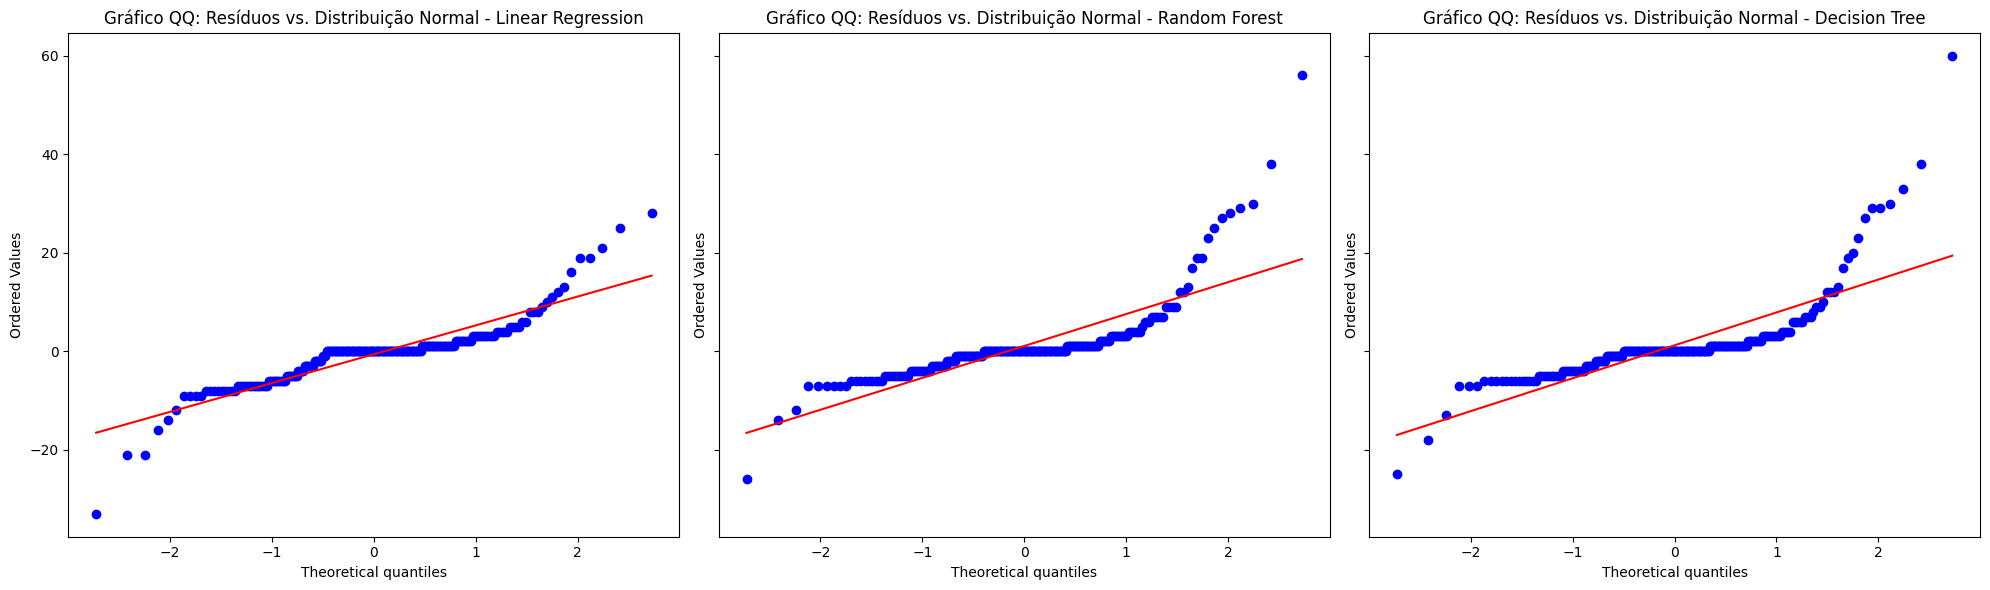

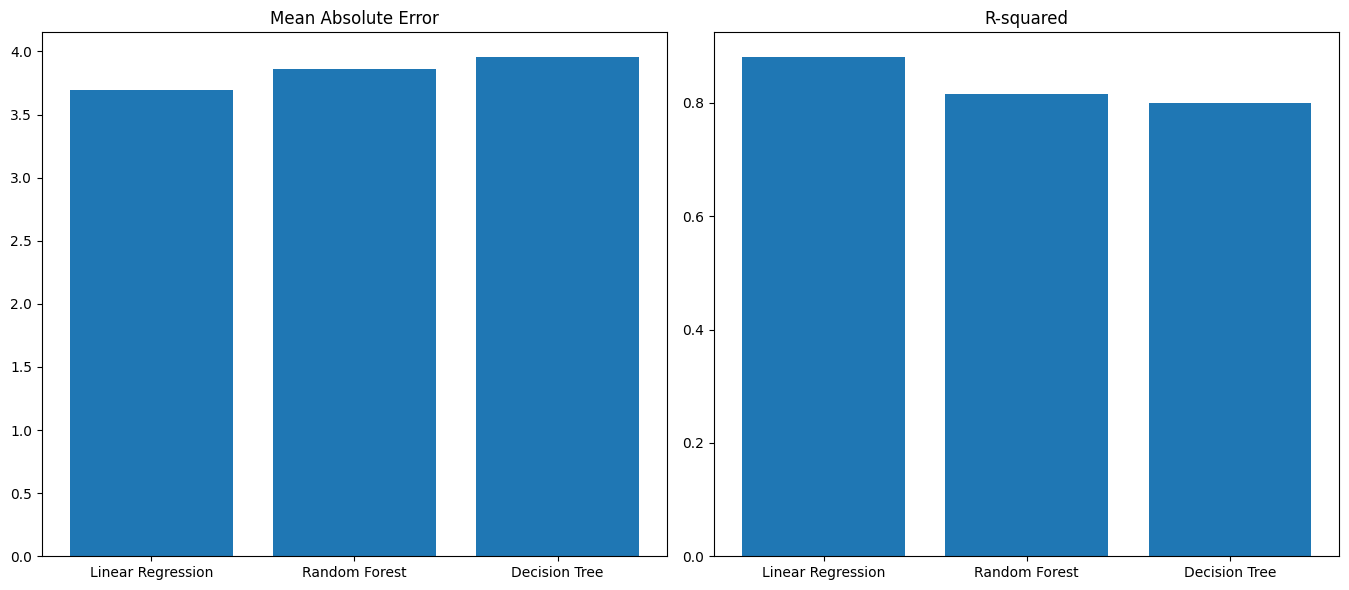

In [ ]:
import scipy.stats as stats

mae_int_dict = {}
r2_int_dict = {}

# Configuração dos subplots com espaçamento vertical
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)
plt.subplots_adjust(wspace=0.5)  # Espaçamento horizontal entre subplots

for ax, (model_name, model, param_grid) in zip(axes, models):
    print(f"Model: {model_name}")

    if param_grid is not None:
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(x_train, y_train)

    y_pred = best_model.predict(x_test)
    y_pred_int = np.maximum(np.round(y_pred).astype(int), 0)

    mae_int = mean_absolute_error(y_test, y_pred_int)
    r2_int = r2_score(y_test, y_pred_int)

    mae_int_dict[model_name] = mae_int
    r2_int_dict[model_name] = r2_int

    print(f"Mean Absolute Error (Inteiros): {mae_int}")
    print(f"R-squared (Inteiros): {r2_int}")
    residuals = y_test - y_pred_int

    # Criar o gráfico Q-Q plot no subplot atual
    stats.probplot(residuals, dist="norm", plot=ax)
    ax.set_title(f"Gráfico QQ: Resíduos vs. Distribuição Normal - {model_name}")

# Ajustar os espaços entre os subplots
plt.tight_layout()

# Gráficos de comparação
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 2)
plt.bar(mae_int_dict.keys(), mae_int_dict.values())
plt.title("Mean Absolute Error")

plt.subplot(1, 3, 3)
plt.bar(r2_int_dict.keys(), r2_int_dict.values())
plt.title("R-squared")

plt.tight_layout()
plt.show()